### PyMC3 Learning Notebook

In [ ]:
import pandas as pd
import numpy as np
!pip install arviz
!pip install pymc3>=3.8
import arviz as az
import pymc3 as pm

!pip install GPy
import GPy as GPy
import pylab as pb
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
!wget https://raw.githubusercontent.com/benavoli/ProbAppNotes/master/Notebooks_Notes/Advertising.csv
data = pd.read_csv('Advertising.csv')

--2020-10-08 20:33:20--  https://raw.githubusercontent.com/benavoli/ProbAppNotes/master/Notebooks_Notes/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv.5’

Advertising.csv.5   100%[===================>]   5.04K  --.-KB/s    in 0s      

2020-10-08 20:33:20 (60.0 MB/s) - ‘Advertising.csv.5’ saved [5166/5166]



In [29]:
# MLE

X = data['TV'].values
y = data['Sales'].values

regmodel = pm.Model()

with regmodel:
  # distributions
  a = pm.Normal('a',.0,30)
  b = pm.Normal('b',.0,30)

  # must be postive and not a distribution with -scalar
  sig = pm.Uniform('sig',.0001,30)

  mu = b*X+a
  pm.Normal('Like', mu, sig, observed = y)

with regmodel:
  # compute posterior values
  samples = pm.sample(10000, tune = 3000, chains = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sig, b, a]
100%|██████████| 13000/13000 [00:20<00:00, 628.70it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [38]:
print(f'{samples[0]}')
print(f'{samples[1]}')
print(f'{samples[5000]}')

{'a': 7.106735816312941, 'b': 0.047506125246801666, 'sig_interval__': -2.1291981452128894, 'sig': 3.1888235255877198}
{'a': 6.737313103876543, 'b': 0.0487677714554973, 'sig_interval__': -2.066777938099977, 'sig': 3.371129077886364}
{'a': 7.072786902822867, 'b': 0.04857592105069527, 'sig_interval__': -2.137950977848519, 'sig': 3.163965607314354}


In [ ]:
az.plot_posterior(samples, var_names=['a', 'b'])
az.plot_posterior(samples, var_names=['sig'])

NameError: ignored

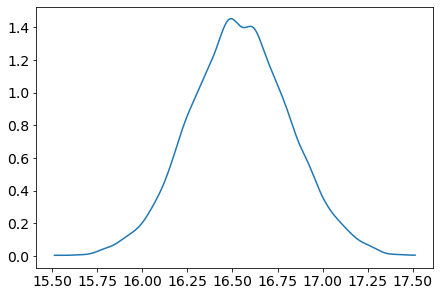

In [62]:
# uncertainty of x = 200
az.plot_dist(200*samples['b'] + samples['a'])
plt.axvline(reg.predict(np.array([[200]])),color='black')

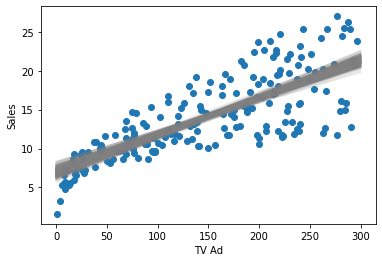

In [46]:
XX = np.linspace(0, 300)
for i in range(200):
  plt.plot(XX, XX*samples['b'][i]+samples['a'][i], c='gray', alpha=.2)
plt.scatter(X, y)
plt.xlabel('TV Ad')
plt.ylabel('Sales')
plt.show()

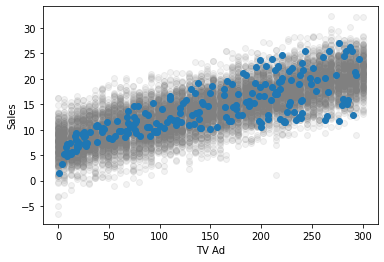

In [51]:
for i in range(200):
  plt.scatter(XX, pm.Normal.dist(XX*samples['b'][i] + samples['a'][i], samples['sig'][i]).random(1), c='gray', alpha=.1)
plt.scatter(X, y, Zorder=1000)
plt.xlabel('TV Ad')
plt.ylabel('Sales')
plt.show()

0.09


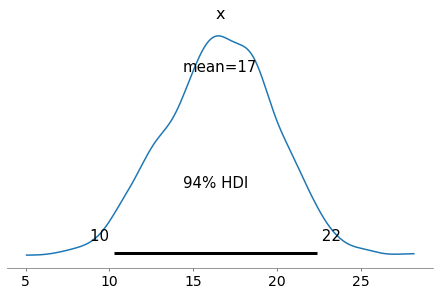

In [52]:
acc = []
for i in range(2000):
  acc.append(pm.Normal.dist(200*samples['b'][i] + samples['a'][i], samples['sig'][i]).random(1))
acc = np.array(acc)

print(f'{np.sum((acc<12))/len(acc)}')
az.plot_posterior(np.array(acc))